# Задание 6

Теперь давайте попробуем примерно оценить нагрузку на наших курьеров и узнаем, сколько в среднем заказов и пользователей приходится на каждого из них.

Задание:

На основе данных в таблицах user_actions, courier_actions и orders для каждого дня рассчитайте следующие показатели:

1. Число платящих пользователей на одного активного курьера.
2. Число заказов на одного активного курьера.
Колонки с показателями назовите соответственно users_per_courier и orders_per_courier. Колонку с датами назовите date. При расчёте показателей округляйте значения до двух знаков после запятой.

Результирующая таблица должна быть отсортирована по возрастанию даты.

Поля в результирующей таблице: date, users_per_courier, orders_per_courier

```sql
with paying_us AS (
  SELECT
    time :: date AS date,
    COUNT(DISTINCT user_id) AS paying_users
  FROM
    user_actions
  WHERE
    order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
),
activ_cour AS (
  SELECT
    time :: date AS date,
    COUNT(DISTINCT courier_id) AS active_couriers
  FROM
    courier_actions
  WHERE
    order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
),
ord AS (
  SELECT
    creation_time :: date AS date,
    COUNT(DISTINCT order_id) AS act_orders
  FROM
    orders
  WHERE
    order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
)
SELECT
  paying_us.date,
  ROUND(paying_users :: decimal / active_couriers, 2) AS users_per_courier,
  ROUND(act_orders :: decimal / active_couriers, 2) AS orders_per_courier
FROM
  paying_us
  JOIN activ_cour using (date)
  JOIN ord using (date)
ORDER BY
  1
```

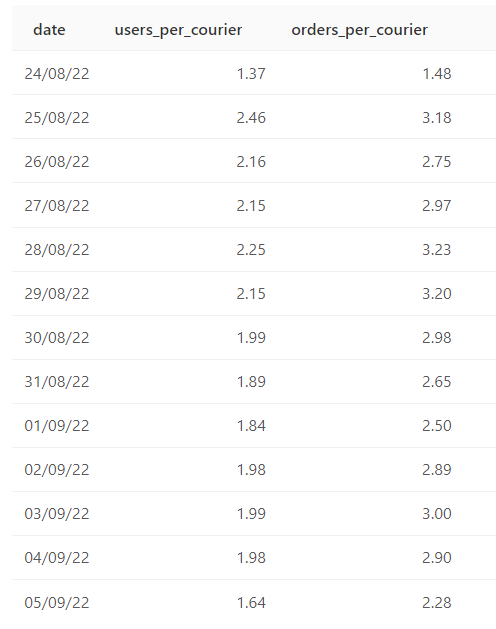

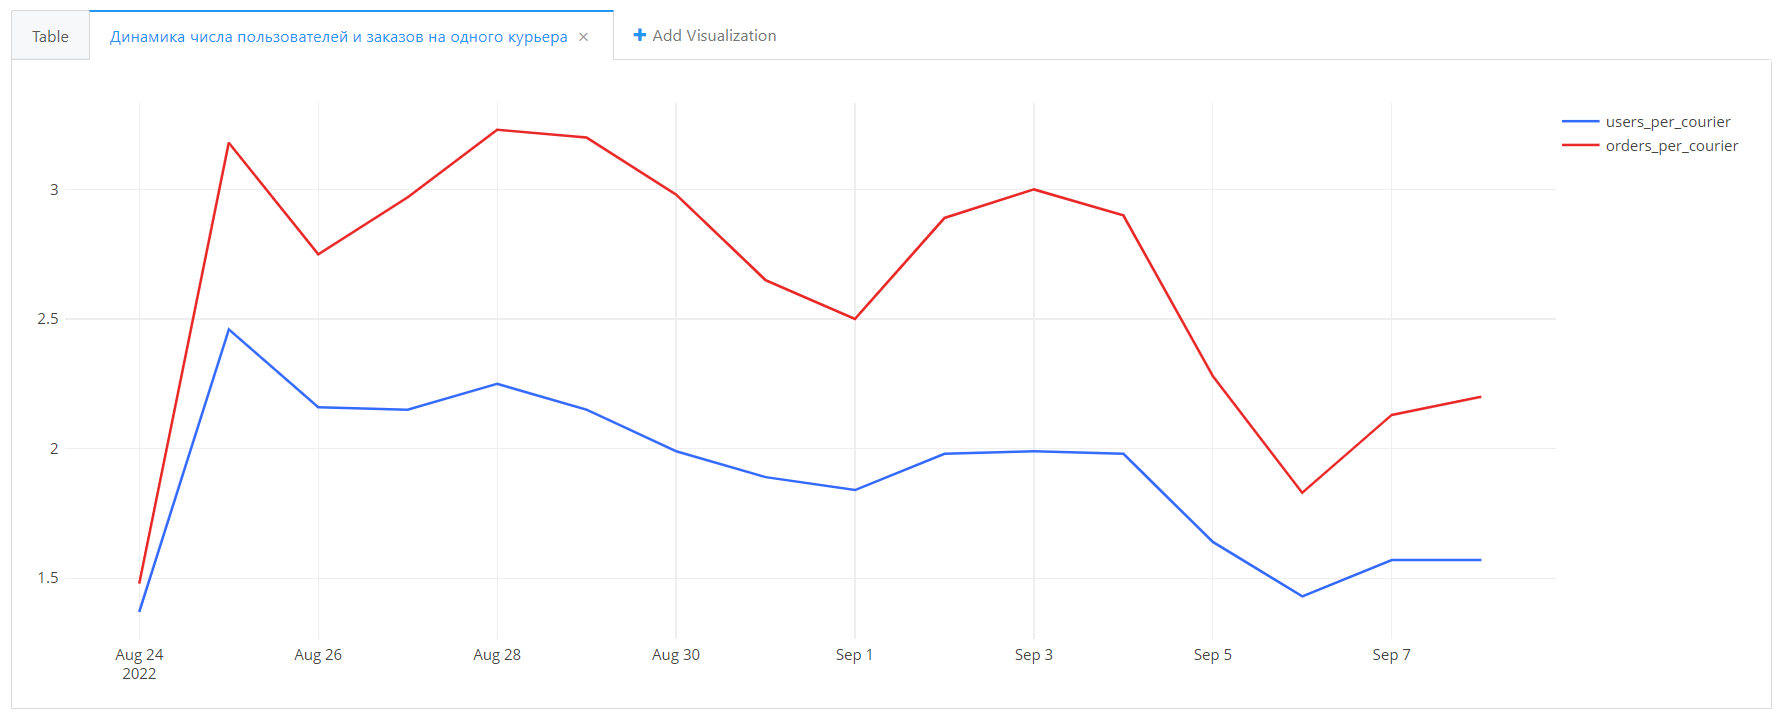